## AIML Module Project - Recommendation Systems - Project 

# Electronics Gadgets Recommendation System

India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors.
As per Consumer behaviour, 97% of consumers turn to a search engine when they are
buying a product vs. 15% who turn to social media. If a seller succeeds to publish
smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same.
This Case Study is targeted to build a recommendation system based on individual
consumer’s behaviour or choice.


# Objective

We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalized respectively.


## Attribute Information

- author : name of the person who gave the rating
- country : country the person who gave the rating belongs to
- data : date of the rating
- domain: website from which the rating was taken from 
- extract: rating content
- language: language in which the rating was given
- product: name of the product/mobile phone for which the rating was given
- score: average rating for the phone
- score_max: highest rating given for the phone
- source: source from where the rating was taken

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data 

4. Exploratory Data Analysis and Data Preprocessing

5. Popularity Based Recommendation System

6. Collaborative Filtering

7. Collaborative Filtering with Surprise Library

8. Conclusion and Interpretation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install surprise

#1. Import Libraries

Import the necessary libraries

In [ ]:
# Pandas is used for data manipulation and analysis
import pandas as pd

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators
import numpy as np

#Matplotlib and Seaborn is a data visualization library for 2D plots of arrays
import matplotlib.pyplot as plt
import seaborn as sns


# os and glob are used to provide a way of using operating system dependent functionality
import os
import glob

# LabelEncoder is used to encode Categorical variables to simplify complex  
from sklearn.preprocessing import LabelEncoder

# Importing SVD 
from scipy.sparse.linalg import svds

# Importing SVD, KNN with Means, cross validate from surprise
from surprise import SVD, Dataset, Reader, KNNWithMeans
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

# filterwarnings to ignore all unnecessary warnings and logs
import warnings

# 2. Setting options

In [ ]:
# plot below cell
%matplotlib inline 
%matplotlib notebook

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

# 3. Read Data

Read the CSVs as a data frame

In [ ]:
# Setting Working Directory to the deisred location on Google Drive
os.chdir('/content/drive/MyDrive/7-Recommendation Systems/Dataset')

# Verifying, if Working directory is set at correct destination
os.getcwd()



'/content/drive/.shortcut-targets-by-id/1tw9Vrm8YWpdA72i2SykyvD7Izw0B7CLY/7-Recommendation Systems/Dataset'

Merge the provided csvs into one dataframe

In [ ]:
# Reading all files and Merging data in single DataFrame

path = "/content/drive/MyDrive/7-Recommendation Systems/Dataset"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',',encoding='latin')
   # f['file'] = f.split('/')[-1]
    all_df.append(df)
    
merged_df = pd.concat(all_df, ignore_index=True, sort=True)

# 4. Exploratory Data Analysis and Data Preprocessing

Check a few observations and shape of the dataframe

In [ ]:
# Checking Dimensions of Merged DataFrame
merged_df.shape

(1415133, 11)

In [ ]:
# Verifying first records of available data in the merged DataFrame

merged_df.head(4)

,author,country,date,domain,extract,lang,phone_url,product,score,score_max,source
0,CarolAnn35,us,5/2/2017,verizonwireless.com,As a diehard Samsung fan who has had every Sam...,en,/cellphones/samsung-galaxy-s8/,Samsung Galaxy S8,10.0000000,10.0000000,Verizon Wireless
1,james0923,us,4/28/2017,phonearena.com,Love the phone. the phone is sleek and smooth ...,en,/cellphones/samsung-galaxy-s8/,Samsung Galaxy S8,10.0000000,10.0000000,Phone Arena
2,R. Craig,us,5/4/2017,amazon.com,Adequate feel. Nice heft. Processor's still sl...,en,/cellphones/samsung-galaxy-s8/,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl...",6.0000000,10.0000000,Amazon
3,Buster2020,us,5/2/2017,samsung.com,Never disappointed. One of the reasons I've be...,en,/cellphones/samsung-galaxy-s8/,Samsung Galaxy S8 64GB (AT&T),9.2000000,10.0000000,Samsung


In [ ]:
# Checking dataTypes of the features

merged_df.dtypes

author        object
country       object
date          object
domain        object
extract       object
lang          object
phone_url     object
product       object
score        float64
score_max    float64
source        object
dtype: object

In [ ]:
# Verifying Shape of the DataFrame

merged_df.shape

(1415133, 11)

In [ ]:
# Significant Features for Recommendation System are: Author, Product and Score

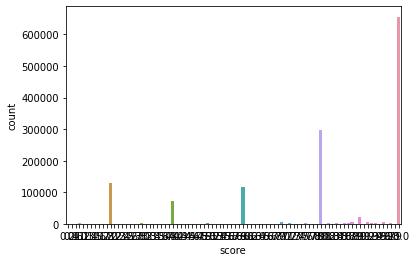

In [ ]:
# Verifying Distribution of score given by users to Product
%matplotlib inline
sns.countplot(merged_df['score'])

Round off scores to the nearest integers

In [ ]:
#Rounding off Score to nearest Integer

merged_df['score'] = round(merged_df['score'])

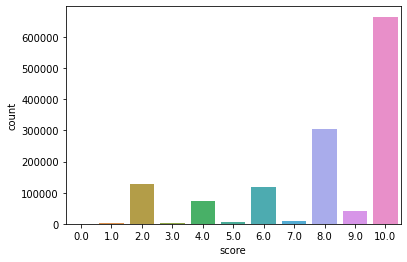

In [ ]:
# Verifying Distribution of score given by users to Product after Rounding Off

sns.countplot(merged_df['score'])

In [ ]:
#Measuring Unique users and unique products in the Dataset

print(merged_df['product'].nunique())
print(merged_df['author'].nunique())

61313
801103


Check for missing values. Impute the missing values if there is any

In [ ]:
# Checking for presence of NA values in the DataSet

merged_df.isna().sum().any()

True

In [ ]:
# Checking for count of NA values in the DataSet

merged_df.isna().sum()

author       63202
country          0
date             0
domain           0
extract      19361
lang             0
phone_url        0
product          1
score        63489
score_max    63489
source           0
dtype: int64

In [ ]:
# Dropping NA values from the Dataset, since contributing negligible as compared to overall Dataset

merged_df.dropna(inplace=True)

Check for duplicate values and remove them if there is any

In [ ]:
# Checking presence of Duplicate records in the Dataset

merged_df.duplicated().any()

True

In [ ]:
# Checking for Number of Duplicate records in the Dataset

merged_df.duplicated().sum()

4480

In [ ]:
# Dropping Duplicate records in the Dataset

merged_df.drop_duplicates(keep='first',inplace=True)

In [ ]:
# Verifying absence of Duplicate Records in the Dataset again

merged_df.duplicated().sum()

0

In [ ]:
# Checking Shape of Dataframe after preprocessing

merged_df.shape

(1271437, 11)

Keep only 1000000 data samples. Use random state=612

In [ ]:
# Limiting Dataset to 1 Million Records

df_sample = merged_df.sample(n=1000000,random_state=612)

In [ ]:
# Confirming number of records in Dataset once again

df_sample.shape

(1000000, 11)

Drop irrelevant features. Keep features like Author, Product, and Score

In [ ]:
# Dropping features other than Autho, Product and Score

df_sample.drop(df_sample.columns.difference(['author','product','score']),inplace=True,axis=1)

In [ ]:
# Verifying updated DataFrame

df_sample.head()

,author,product,score
510111,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)",10.0000000
104794,Evyta,Samsung Galaxy S6,8.0000000
1222473,VanRaZor,Sony Ericsson K810i,8.0000000
452910,ruga,Sony Xperia Z2 (Black),6.0000000
16933,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,...",10.0000000


# 5. Popularity Based Recommendation System

Identify the most rated features

In [ ]:
# Calculating Number of times user have rated a Product

rating_per_user = df_sample.groupby(by='author')['score'].count().sort_values(ascending=False)

In [ ]:
rating_per_user.head()

author
Amazon Customer    60408
Cliente Amazon     15051
e-bit               6651
Client d'Amazon     6087
Amazon Kunde        3683
Name: score, dtype: int64

Identify the users with most number of reviews

In [ ]:
# Calculating Number of times Product has been rated

rating_per_prod = df_sample.groupby(by='product')['score'].count().sort_values(ascending=False)
rating_per_prod.head(5)

product
Lenovo Vibe K4 Note (White,16GB)     4109
Lenovo Vibe K4 Note (Black, 16GB)    3451
OnePlus 3 (Graphite, 64 GB)          3212
OnePlus 3 (Soft Gold, 64 GB)         2798
Huawei P8lite zwart / 16 GB          2121
Name: score, dtype: int64

Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final
dataset.

In [ ]:
# Consolidating above results to form a DataFrame with 3 features (Author, Product and Score)

Count_of_rating = df_sample['author'].value_counts()
topProds = df_sample[df_sample['author'].isin(Count_of_rating[Count_of_rating >= 50].index)]
topProds.head()

,author,product,score
16933,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,...",10.0000000
235474,Alejandro,Asus Zenfone 2 (ZE551ML) - Smartphone libre An...,2.0000000
875609,Cliente Amazon,"Samsung E1200 Telefono Cellulare, Nero [Italia]",10.0000000
209501,Amazon Customer,"Asus Zenfone Selfie ZD551KL (Silver,2G 16GB)",2.0000000
962436,ÐÐ½Ð´ÑÐµÐ¹,LG P920 Optimus 3D,10.0000000


Build a popularity based model and recommend top 5 mobile phones

In [ ]:
# Calculating score based upon Rating given by Authors

pop_grouped = df_sample.groupby('product').agg({'author': 'count'}).reset_index()
pop_grouped.rename(columns = {'author': 'score'},inplace=True)
pop_grouped.head()

,product,score
0,'Sony Xperia X (F5122) â White â Dual Sim ...,1
1,'Sony Xperia X (F5122) â rosa â Dual Sim (...,1
2,"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;b...",1
3,"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core An...",1
4,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...,37


In [ ]:
# Assigning Rank Based upon Rating Assigned by Authors

pop_sort = pop_grouped.sort_values(['score', 'product'], ascending = [0,1]) 
pop_sort['Rank'] = pop_sort['score'].rank(ascending=0, method='first')
popularity_recommendations = pop_sort.head()
popularity_recommendations

,product,score,Rank
20584,"Lenovo Vibe K4 Note (White,16GB)",4109,1.0000000
20583,"Lenovo Vibe K4 Note (Black, 16GB)",3451,2.0000000
29905,"OnePlus 3 (Graphite, 64 GB)",3212,3.0000000
29906,"OnePlus 3 (Soft Gold, 64 GB)",2798,4.0000000
14865,Huawei P8lite zwart / 16 GB,2121,5.0000000


In [ ]:
 # A functionthat will take User ID assigned to Author as input and Provide Recommendations as Output
 
 def recommend(user_id):     

    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['author'] = user_id 
    
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [ ]:
# Testing Recommendations on random Authors

recommend(120)

,author,product,score,Rank
20584,120,"Lenovo Vibe K4 Note (White,16GB)",4109,1.0000000
20583,120,"Lenovo Vibe K4 Note (Black, 16GB)",3451,2.0000000
29905,120,"OnePlus 3 (Graphite, 64 GB)",3212,3.0000000
29906,120,"OnePlus 3 (Soft Gold, 64 GB)",2798,4.0000000
14865,120,Huawei P8lite zwart / 16 GB,2121,5.0000000


In [ ]:
recommend(520)

,author,product,score,Rank
20584,520,"Lenovo Vibe K4 Note (White,16GB)",4109,1.0000000
20583,520,"Lenovo Vibe K4 Note (Black, 16GB)",3451,2.0000000
29905,520,"OnePlus 3 (Graphite, 64 GB)",3212,3.0000000
29906,520,"OnePlus 3 (Soft Gold, 64 GB)",2798,4.0000000
14865,520,Huawei P8lite zwart / 16 GB,2121,5.0000000


# Collaborative Filtering

Building a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch

In [ ]:
# Checking shape of preprocessed DataFrame

merged_df.shape

(1271437, 11)

In [ ]:
# Limiting Dataset to 10k records and sampling these records randomly

df_sample = merged_df.sample(n=5000,random_state=612)

In [ ]:
# Confirming dimensions of the DataFrame

df_sample.shape

(5000, 11)

In [ ]:
# Calculating Number of times user have rated a Product

rating_per_prod = merged_df.groupby(by='product')['score'].count().sort_values(ascending=False)

In [ ]:
# Dropping features other than Author, Product and Score

df_sample.drop(df_sample.columns.difference(['author','product','score']),inplace=True,axis=1)

In [ ]:
df_sample.head(4)

,author,product,score
510111,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)",10.0000000
104794,Evyta,Samsung Galaxy S6,8.0000000
1222473,VanRaZor,Sony Ericsson K810i,8.0000000
452910,ruga,Sony Xperia Z2 (Black),6.0000000


In [ ]:
# Confirming removal of other features

df_sample.shape

(5000, 3)

In [ ]:
# Checking for Unique users in the Sampled Dataset

df_sample['author'].nunique()

4382

In [ ]:
# Checking for Unique Products in the Sampled Dataset

df_sample['product'].nunique()

3770

In [ ]:
# Initiating LabelEncoder

le = LabelEncoder()

In [ ]:
# Encoding Author and Product as unique integers for simplification

df_sample['author'] = le.fit_transform(df_sample['author'])
df_sample['product'] = le.fit_transform(df_sample['product'])

In [ ]:
# Verifying Encoding
# For Example: 
# User 'William Lewis' is encoded as '5418'
# Product 'Microsoft Lumia 435 (Dual SIM, Black)' is encoded as 2575

df_sample.head()

,author,product,score
510111,1423,1466,10.0000000
104794,854,2780,8.0000000
1222473,2761,3271,8.0000000
452910,3890,3511,6.0000000
16933,3221,2869,10.0000000


In [ ]:
# Applying Pivot 'Product Vs Users' and allocating Ratings as values. 
# 0 indicates user have not rated the product yet

df_sample.set_index('product',inplace=True)
pivot_data = df_sample.pivot_table(index='product',columns='author',values='score',aggfunc=np.mean).fillna(0)
pivot_data

In [ ]:
# Applying SVD to the pivoted data and limitng singular values or vectors to 50 
# and assigning values to U, Sigma and Vt 

U, sigma, Vt = svds(pivot_data, k = 50) 

In [ ]:
# Verifying assignment of U
U

array([[ 2.41366173e-18,  5.88539071e-18,  1.33748893e-19, ...,
        -5.27623413e-19, -6.00410641e-19,  1.31768944e-18],
       [-8.80468855e-21, -7.30627173e-21,  1.26940569e-21, ...,
        -1.09140830e-20,  2.17406810e-21,  2.71669597e-21],
       [ 5.27441041e-17,  5.82149555e-17,  9.89211128e-18, ...,
         4.45341609e-18, -6.82409911e-19, -2.83612151e-18],
       ...,
       [-1.41640006e-18, -3.46139501e-18, -6.58524539e-20, ...,
         1.74673798e-19,  2.50916520e-19, -7.27951924e-19],
       [ 5.07330611e-18,  1.22865303e-17,  2.85137894e-19, ...,
        -8.86914719e-19, -8.75582431e-20,  3.02299790e-18],
       [ 2.35859220e-18,  5.68988539e-18,  1.16781404e-19, ...,
        -1.71398232e-19, -1.90928944e-19,  1.34575753e-18]])

In [ ]:
# Verifying assignment of sigma

sigma

array([ 20.29451594,  20.39607805,  20.43758803,  20.59126028,
        20.63582846,  20.639472  ,  20.63976744,  20.68816087,
        20.68816087,  20.74313293,  20.74649197,  20.75931222,
        20.99777977,  21.09502311,  21.23731336,  21.49418526,
        21.75327747,  21.91073799,  21.9317122 ,  22.36067977,
        22.36067977,  22.5166605 ,  23.15167381,  23.43074903,
        23.49468025,  23.57965225,  23.74868417,  24.2899156 ,
        24.33348501,  24.67792536,  25.01771484,  25.05992817,
        25.20931079,  25.21904043,  25.84569597,  26.45751311,
        26.71354539,  26.93298837,  26.94438717,  26.948246  ,
        27.05311975,  27.31300057,  28.74021573,  32.13635675,
        36.91063315,  37.04976255,  37.792326  ,  44.40617204,
        67.32912647, 112.04394812])

In [ ]:
# Verifying assignment of Vt

Vt

array([[-4.84952059e-17, -8.19434259e-19, -5.00992018e-21, ...,
         4.06771044e-19,  1.39702353e-18,  1.16218204e-18],
       [ 2.28424280e-16, -1.49536928e-18, -1.76375962e-21, ...,
         9.67283978e-19,  3.36851672e-18,  2.78969583e-18],
       [-5.26104826e-16, -2.36052469e-19,  8.39712883e-23, ...,
         1.81980178e-20,  6.98369078e-20,  5.71405021e-20],
       ...,
       [ 5.09215874e-18, -1.29805558e-18, -6.71750951e-21, ...,
        -5.76353230e-20, -1.81596389e-19, -3.85978398e-20],
       [-1.76803813e-18,  1.08361564e-19,  1.39835676e-21, ...,
        -1.71646583e-20, -1.14204748e-19, -2.83575555e-20],
       [-2.43495165e-18,  2.14149236e-19,  6.06971957e-22, ...,
         4.13197001e-20,  1.46369708e-19,  1.20109792e-19]])

In [ ]:
# Extracting Diagonal Array out of sigma

sigma = np.diag(sigma)

In [ ]:
# Performing Dot Products to assign values for predictions

predictions_ratings = np.dot(np.dot(U, sigma), Vt) 

In [ ]:
# Creating new DataFrame for Predictions

predictions_df = pd.DataFrame(predictions_ratings, columns = pivot_data.columns)


In [ ]:
# Checking first 5 values of Predictions
# Column = Encoded User
# Row = Encoded Product

predictions_df.head()


author       0          1          2          3          4          5     \
0       0.0000000 -0.0000000  0.0000000 -0.0000000 -0.0000000  0.0000000   
1      -0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000   
2      -0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000  0.0000000   
3       0.0000000 -0.0000000 -0.0000000 -0.0000000  0.0000000 -0.0000000   
4       0.0000000 -0.0000000  0.0000000 -0.0000000 -0.0000000  0.0000000   

author       6          7          8          9          10         11    \
0       0.0000000  0.0000000 -0.0000000 -0.0000000  0.0000000 -0.0000000   
1      -0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000  0.0000000   
2       0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000  0.0000000   
3      -0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000 -0.0000000   
4       0.0000000  0.0000000 -0.0000000 -0.0000000  0.0000000 -0.0000000   

author       12         13         14         15         16         17    \
0      -0.0000000 -0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000   
1       0.0000000  0.0000000 -0.0000000 -0.0000000  0.0000000  0.0000000   
2      -0.0000000 -0.0000000  0.0000000 -0.0000000  0.0000000 -0.0000000   
3       0.0000000  0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000   
4      -0.0000000 -0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000   

author       18         19         20         21         22         23    \
0       0.0000000  0.0000000 -0.0000000  0.0000000  0.0000000 -0.0000000   
1       0.0000000 -0.0000000  0.0000000 -0.0000000 -0.0000000  0.0000000   
2      -0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000  0.0000000   
3       0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000 -0.0000000   
4       0.0000000  0.0000000 -0.0000000  0.0000000  0.0000000 -0.0000000   

author       24         25         26         27         28         29    \
0      -0.0000000 -0.0000000 -0.0000000 -0.0000000  0.0000000 -0.0000000   
1       0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000  0.0000000   
2      -0.0000000  0.0000000 -0.0000000 -0.0000000  0.0000000 -0.0000000   
3       0.0000000 -0.0000000 -0.0000000  0.0000000 -0.0000000 -0.0000000   
4      -0.0000000 -0.0000000 -0.0000000 -0.0000000  0.0000000 -0.0000000   

author       30         31         32         33         34         35    \
0       0.0000000 -0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000   
1      -0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000 -0.0000000   
2       0.0000000 -0.0000000  0.0000000  0.0000000 -0.0000000  0.0000000   
3      -0.0000000  0.0000000  0.0000000 -0.0000000  0.0000000 -0.0000000   
4       0.0000000 -0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000   

author       36         37         38         39         40         41    \
0      -0.0000000 -0.0000000 -0.0000000 -0.0000000 -0.0000000  0.0000000   
1       0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000 -0.0000000   
2      -0.0000000  0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000   
3       0.0000000  0.0000000  0.0000000  0.0000000  0.0000000 -0.0000000   
4      -0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000  0.0000000   

author       42         43         44         45         46         47    \
0       0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000 -0.0000000   
1      -0.0000000 -0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000   
2       0.0000000  0.0000000  0.0000000  0.0000000 -0.0000000 -0.0000000   
3      -0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000 -0.0000000   
4       0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000  0.0000000   

author       48         49         50         51         52         53    \
0      -0.0000000 -0.0000000  0.0000000  0.0000000  0.0000000 -0.0000000   
1       0.0000000  0.0000000  0.0000000 -0.0000000 -0.0000000  0.0000000   
2      -0.0000000 -0.0000000  0.0000000 -0.0000000 -0.0000000 -0.0000000   
3       0.0000000 -0.0000000 -0.0000000 

In [ ]:
# Function to get predictions with User ID and Number of Recommendations as input and Recommendations as Output

def recommend_items(UserID, num_recommendations):
      
    user_idx = UserID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_data.iloc[UserID].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = predictions_df.iloc[UserID].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nRecommended Products for user(UserID = {}):\n'.format(UserID))
    print(temp.head(num_recommendations))

In [ ]:
# Testing Recommendations on various users with varying inputs

In [ ]:
recommend_items(300,3)



Recommended Products for user(UserID = 300):

                   user_ratings  user_predictions
Recommended Items                                
182                   0.0000000         0.0000000
4095                  0.0000000         0.0000000
3221                  0.0000000         0.0000000


In [ ]:
recommend_items(999,2)


Recommended Products for user(UserID = 999):

                   user_ratings  user_predictions
Recommended Items                                
140                   0.0000000         0.0000000
2721                  0.0000000         0.0000000


In [ ]:
recommend_items(60,4)


Recommended Products for user(UserID = 60):

                   user_ratings  user_predictions
Recommended Items                                
182                   0.0000000         0.0000000
4095                  0.0000000         0.0000000
3221                  0.0000000         0.0000000
2038                  0.0000000         0.0000000


#SVD with surprise

In [ ]:
merged_df.head(3)

,author,country,date,domain,extract,lang,phone_url,product,score,score_max,source
0,CarolAnn35,us,5/2/2017,verizonwireless.com,As a diehard Samsung fan who has had every Sam...,en,/cellphones/samsung-galaxy-s8/,Samsung Galaxy S8,10.0000000,10.0000000,Verizon Wireless
1,james0923,us,4/28/2017,phonearena.com,Love the phone. the phone is sleek and smooth ...,en,/cellphones/samsung-galaxy-s8/,Samsung Galaxy S8,10.0000000,10.0000000,Phone Arena
2,R. Craig,us,5/4/2017,amazon.com,Adequate feel. Nice heft. Processor's still sl...,en,/cellphones/samsung-galaxy-s8/,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl...",6.0000000,10.0000000,Amazon


In [ ]:
# Dropping features other than Author, Product and Score

merged_df.drop(merged_df.columns.difference(['author','product','score']),inplace=True,axis=1)

In [ ]:
merged_df.head(3)

,author,product,score
0,CarolAnn35,Samsung Galaxy S8,10.0000000
1,james0923,Samsung Galaxy S8,10.0000000
2,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl...",6.0000000


In [ ]:
# Identifying Most Rated Prducts

merged_df.groupby('product')['score'].count().reset_index().sort_values('score', ascending=False)[:10]

,product,score
21748,"Lenovo Vibe K4 Note (White,16GB)",5223
21747,"Lenovo Vibe K4 Note (Black, 16GB)",4389
31553,"OnePlus 3 (Graphite, 64 GB)",4103
31554,"OnePlus 3 (Soft Gold, 64 GB)",3557
15727,Huawei P8lite zwart / 16 GB,2707
21751,"Lenovo Vibe K5 (Gold, VoLTE update)",2534
40395,Samsung Galaxy S6 zwart / 32 GB,2342
21753,"Lenovo Vibe K5 (Grey, VoLTE update)",2108
21712,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)",1951
31569,"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)",1883


In [ ]:
# Identifying Users with most reviews

merged_df.groupby('author')['score'].count().reset_index().sort_values('score', ascending=False)[:10]

,author,score
29209,Amazon Customer,76933
94187,Cliente Amazon,19300
559409,e-bit,8411
94158,Client d'Amazon,7716
29648,Amazon Kunde,4746
561219,einer Kundin,2610
40168,Anonymous,2607
561216,einem Kunden,1898
723565,unknown,1725
40169,Anonymous,1460


In [ ]:
# Downsampling Dataset with top 50 users and top 50 products 
# sorted with the help of Ratings

min_ratings = 50
filter_products = merged_df['product'].value_counts() > min_ratings
filter_products = filter_products[filter_products].index.tolist()

min_user_ratings = 50
filter_users = merged_df['author'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = merged_df[(merged_df['product'].isin(filter_products)) & (merged_df['author'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(merged_df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(1271437, 3)
The new data frame shape:	(161974, 3)


In [ ]:
# Loading Dataset for Surprise and
# assigning Rating on scale of 1-10

reader = Reader(rating_scale=(1,10))
data = Dataset.load_from_df(df_new[['author', 'product', 'score']], reader)

Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model

In [ ]:
# Applying SVD and KNN with Means with 20 means algorithm to recommend
# Applying k-fold cross validation with 5 folds to achieve better performance
 
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNWithMeans(k=20)]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,2.7487752,8.1319374,0.3304559
KNNWithMeans,2.7600045,0.8385238,6.3497177


Evaluate the collaborative model. Print RMSE value.

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)
algo_svd = SVD()
predictions = algo_svd.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 2.7317


2.7317227800106902

Predict score (average rating) for test users.

In [ ]:
test_author = 'e-bit'
test_product = 'OnePlus 3 (Graphite, 64 GB)'

In [ ]:
# Predicting score for random user and random product 

svd_test = algo_svd.predict(test_author,test_product)[3]

In [ ]:
# Applying Knn with Means with 30 means

trainset, testset = train_test_split(data, test_size=0.25)
algo_knn = KNNWithMeans(k=30)
predictions = algo_knn.fit(trainset).test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.7548


2.7547708702264884

In [ ]:
# Predicting score for random user and random product 

knn_test = algo_knn.predict(test_author,test_product)[3]

Report your findings and inferences

In [ ]:
print('Predicted Score for Author',test_author,'and Product',test_product,'using SVD method is',format(np.round(svd_test,2) ))
print('Predicted Score for Author',test_author,'and Product',test_product,'using KNN with Means method is',format(np.round(knn_test,2)))

Predicted Score for Author e-bit and Product OnePlus 3 (Graphite, 64 GB) using SVD method is 9.08
Predicted Score for Author e-bit and Product OnePlus 3 (Graphite, 64 GB) using KNN with Means method is 8.89


Try and recommend top 5 products for test users.

In [ ]:
#  Function to return number of items rated by given user 

def get_Iu(uid):
       # uid: the id of the user
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0
   #    return the number of items rated by the user

    
# Function to return number of users that have rated given item

def get_Ui(iid):
    #  iid: the raw id of the item
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    #   return the number of users that have rated the item.
    
 # Getting Top Predictions based upon Error between Actual and predicted   
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:5]


In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
15676,patrick,Samsung Galaxy Y Duos S6102b Android Dual SIM ...,10.0000000,10.0000000,"{'actual_k': 1, 'was_impossible': False}",22,4,0.0000000
34012,Helen,Motorola Moto G 4G SIM-Free Smartphone - Black...,10.0000000,10.0000000,"{'actual_k': 30, 'was_impossible': False}",22,67,0.0000000
34002,Federico,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.0000000,10.0000000,"{'actual_k': 30, 'was_impossible': False}",106,348,0.0000000
5885,Qantas,Samsung Galaxy Y S5360,4.0000000,4.0000000,"{'actual_k': 1, 'was_impossible': False}",102,1,0.0000000
20743,Matteo,"Lenovo Motorola Moto G LTE Smartphone, Display...",10.0000000,10.0000000,"{'actual_k': 30, 'was_impossible': False}",151,157,0.0000000


In [ ]:
# Verifying output from Function get_Ui

get_Ui('Smartphone LG K10 K430TV')

147

In [ ]:
# Verifying output from Function getIu

get_Iu('Cliente Amazon')


8818

In what business scenario should you use Popularity Based Recommendation system?

One of the major advantages of the pop based recommendation system is that it doesn't suffer from the cold start problem i.e. even if you're just starting with a business you can use this recommendation system as it can recommend products on various different filters and there's also no need of a user's historical data. A good example of this would be imdb.

In what business scenario you should use CF based Recommendation Systems?

This type of recommendation system works pretty well if we have large volume of information about items and users. We can do user based or item based recommendation.